In [2]:
import os
import matplotlib.pyplot as plt

# Define dataset root path 
dataset_root = r"C:\Users\sihus\OneDrive\Desktop\MP DL\processed_images"

## Count number of images in each class

Abnormal Heartbeat: 233 images
History of MI: 172 images
MI: 239 images
Normal: 284 images


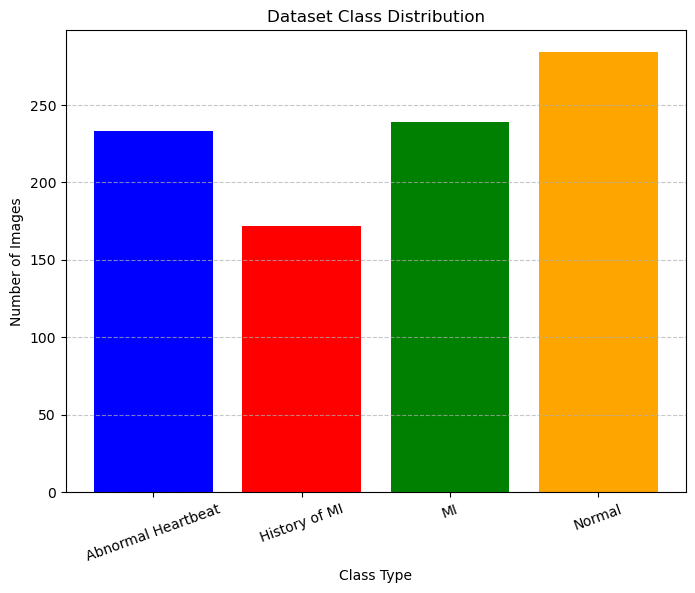

In [4]:
# Define paths to class folders
class_folders = ["Abnormal Heartbeat", "History of MI", "MI", "Normal"]


class_counts = {}
for class_name in class_folders:
    class_path = os.path.join(dataset_root, class_name)
    num_images = len(os.listdir(class_path))  # Count files
    class_counts[class_name] = num_images

# Display results
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'red', 'green','orange'])
plt.xlabel("Class Type")
plt.ylabel("Number of Images")
plt.title("Dataset Class Distribution")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

## Check File Formats

In [6]:
# List a few image filenames from each class
for class_name in ["Abnormal Heartbeat", "History of MI", "MI", "Normal"]:
    class_path = os.path.join(dataset_root, class_name)
    sample_files = os.listdir(class_path)[:5]  # Get first 5 files
    print(f"\n{class_name} sample images:")
    print(sample_files)



Abnormal Heartbeat sample images:
['HB(1)_cleaned.png', 'HB(10)_cleaned.png', 'HB(100)_cleaned.png', 'HB(101)_cleaned.png', 'HB(102)_cleaned.png']

History of MI sample images:
['PMI(1)_cleaned.png', 'PMI(10)_cleaned.png', 'PMI(100)_cleaned.png', 'PMI(101)_cleaned.png', 'PMI(102)_cleaned.png']

MI sample images:
['MI(1)_cleaned.png', 'MI(10)_cleaned.png', 'MI(100)_cleaned.png', 'MI(101)_cleaned.png', 'MI(102)_cleaned.png']

Normal sample images:
['Normal(1)_cleaned.png', 'Normal(10)_cleaned.png', 'Normal(100)_cleaned.png', 'Normal(101)_cleaned.png', 'Normal(102)_cleaned.png']


## Display Sample Images

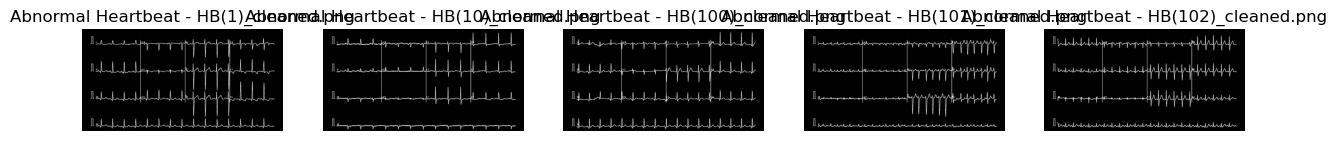

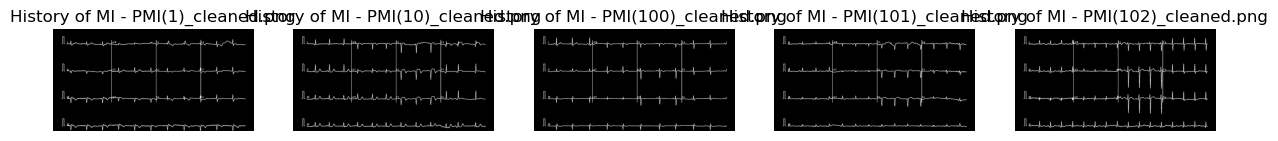

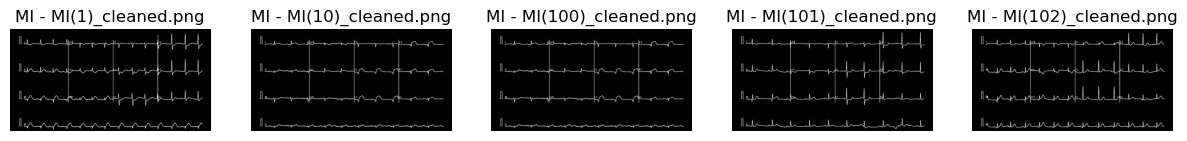

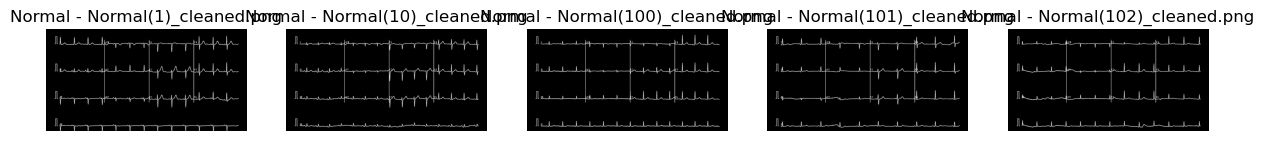

In [8]:
import matplotlib.pyplot as plt
import cv2

# Function to display images
def show_sample_images(class_name, num_samples=5):
    class_path = os.path.join(dataset_root, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg','.png'))][:num_samples]

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f"{class_name} - {img_file}")
        axes[i].axis("off")

    plt.show()

# Display samples for each class
for category in ["Abnormal Heartbeat", "History of MI", "MI", "Normal"]:
    show_sample_images(category)


## Function to check image properties

In [9]:
import cv2
import numpy as np

def check_image_properties(class_name, num_samples=5):
    class_path = os.path.join(dataset_root, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))][:num_samples]

    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)  # Load the image
        height, width, channels = img.shape  # Get shape
        
        print(f"{img_file}:")
        print(f" - Dimensions: {width}x{height}")
        print(f" - Channels: {channels} (1=Grayscale, 3=RGB)")
        print(f" - Min Pixel Value: {np.min(img)}, Max Pixel Value: {np.max(img)}\n")

# Check properties for each class
for category in ["Abnormal Heartbeat", "History of MI", "MI", "Normal"]:
    print(f"\nChecking images in {category}...")
    check_image_properties(category)



Checking images in Abnormal Heartbeat...
HB(1)_cleaned.png:
 - Dimensions: 2213x1122
 - Channels: 3 (1=Grayscale, 3=RGB)
 - Min Pixel Value: 0, Max Pixel Value: 255

HB(10)_cleaned.png:
 - Dimensions: 2213x1122
 - Channels: 3 (1=Grayscale, 3=RGB)
 - Min Pixel Value: 0, Max Pixel Value: 255

HB(100)_cleaned.png:
 - Dimensions: 2213x1122
 - Channels: 3 (1=Grayscale, 3=RGB)
 - Min Pixel Value: 0, Max Pixel Value: 255

HB(101)_cleaned.png:
 - Dimensions: 2213x1122
 - Channels: 3 (1=Grayscale, 3=RGB)
 - Min Pixel Value: 0, Max Pixel Value: 255

HB(102)_cleaned.png:
 - Dimensions: 2213x1122
 - Channels: 3 (1=Grayscale, 3=RGB)
 - Min Pixel Value: 0, Max Pixel Value: 255


Checking images in History of MI...
PMI(1)_cleaned.png:
 - Dimensions: 2213x1122
 - Channels: 3 (1=Grayscale, 3=RGB)
 - Min Pixel Value: 0, Max Pixel Value: 255

PMI(10)_cleaned.png:
 - Dimensions: 2213x1122
 - Channels: 3 (1=Grayscale, 3=RGB)
 - Min Pixel Value: 0, Max Pixel Value: 255

PMI(100)_cleaned.png:
 - Dimensions:

## preprocess images for better fit in resnet ( images should be RGB , and resized to 224*224)

In [12]:
import cv2
import numpy as np
import os
from tqdm import tqdm
from sklearn.utils import shuffle

# Standard image size
IMG_SIZE = 224  

# Function to preprocess images (keeping RGB format)
def preprocess_images(class_name):
    class_path = os.path.join(dataset_root, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    processed_images = []
    labels = []
    
    # Label mapping
    label_dict = {"Abnormal Heartbeat":0, "History of MI":1, "MI":2, "Normal":3}

    for img_file in tqdm(image_files, desc=f"Processing {class_name}"):
        img_path = os.path.join(class_path, img_file)

        # Load image in RGB (No Grayscale)
        img = cv2.imread(img_path)  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR (OpenCV default) to RGB

        # Resize to standard size
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        # Normalize pixel values (0 to 1)
        img = img / 255.0

        # Append to list
        processed_images.append(img)
        labels.append(label_dict[class_name])

    return np.array(processed_images), np.array(labels)

# Process all images
X_abn, y_abn = preprocess_images("Abnormal Heartbeat")
X_his, y_his = preprocess_images("History of MI")
X_normal, y_normal = preprocess_images("MI")
X_new, y_new = preprocess_images("Normal")


# Combine all classes
X = np.concatenate([X_abn, X_his, X_normal,X_new], axis=0)
y = np.concatenate([y_abn, y_his, y_normal, y_new], axis=0)

# Shuffle dataset
X, y = shuffle(X, y, random_state=42)

# Print final dataset details
print(f"Final dataset shape: {X.shape}, Labels shape: {y.shape}")


Processing Normal: 100%|█████████████████████████████████████████████████████████████| 284/284 [00:15<00:00, 18.70it/s]


Final dataset shape: (928, 224, 224, 3), Labels shape: (928,)


## Training the model

In [107]:
y_tensor = torch.tensor(y, dtype=torch.long)
torch.unique(y_tensor)

tensor([0, 1, 2, 3])

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
import numpy as np

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# **Split Data into Train, Validation, and Test Sets**
y_tensor = torch.tensor(y, dtype=torch.long)  # Convert labels to PyTorch tensor

# Split dataset (70% Train, 15% Validation, 15% Test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y_tensor, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

#  **Define Custom PyTorch Dataset**
class  HeartDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label = self.labels[idx]

        # Convert to Tensor
        img = torch.tensor(img, dtype=torch.float32)
        img = img.permute(2, 0, 1)  # Change (224,224,3) → (3,224,224) for PyTorch

        if self.transform:
            img = self.transform(img)

        return img, label

# Define Transformations
transform = transforms.Compose([
    transforms.Normalize([0.5], [0.5])  # Normalize between -1 and 1
])

# Create Dataset and DataLoaders
train_dataset = HeartDataset(X_train, y_train, transform=transform)
val_dataset =  HeartDataset(X_val, y_val, transform=transform)
test_dataset =  HeartDataset(X_test, y_test, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#  **Load Pretrained ResNet-50 and Modify Last Layer**
resnet50 = models.resnet50(pretrained=True)

# Freeze all layers (train only the last FC layer first)
for param in resnet50.parameters():
    param.requires_grad = False

# Replace the last FC layer
num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_ftrs, 4)  

# Move model to GPU
resnet50 = resnet50.to(device)

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet50.fc.parameters(), lr=0.0001)

# Tracking
num_epochs = 50
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Initial training (last layer only)
for epoch in range(num_epochs):
    resnet50.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet50(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    # Validation
    resnet50.eval()
    val_correct = 0
    val_total = 0
    val_loss_epoch = 0.0
    with torch.no_grad():
        for val_images, val_labels in val_loader:
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = resnet50(val_images)
            val_loss = criterion(val_outputs, val_labels)
            val_loss_epoch += val_loss.item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    avg_val_loss = val_loss_epoch / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.2f}% | "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

# Fine-tuning last residual block
for param in list(resnet50.layer4.parameters()):
    param.requires_grad = True

optimizer = optim.Adam(resnet50.parameters(), lr=0.00001)
fine_tune_epochs = 5

for epoch in range(fine_tune_epochs):
    resnet50.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet50(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    # Validation
    resnet50.eval()
    val_correct = 0
    val_total = 0
    val_loss_epoch = 0.0
    with torch.no_grad():
        for val_images, val_labels in val_loader:
            val_images, val_labels = val_images.to(device), val_labels.to(device)
            val_outputs = resnet50(val_images)
            val_loss = criterion(val_outputs, val_labels)
            val_loss_epoch += val_loss.item()
            _, val_predicted = torch.max(val_outputs, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    avg_val_loss = val_loss_epoch / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Fine-tune Epoch {epoch+1}/{fine_tune_epochs} | "
          f"Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.2f}% | "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

Using device: cuda
Train size: 649, Validation size: 139, Test size: 140


C:\Users\sihus\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\sihus\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/50 | Train Loss: 1.3343, Train Acc: 35.75% | Val Loss: 1.3598, Val Acc: 34.53%
Epoch 2/50 | Train Loss: 1.2705, Train Acc: 43.91% | Val Loss: 1.2764, Val Acc: 51.08%
Epoch 3/50 | Train Loss: 1.2040, Train Acc: 59.32% | Val Loss: 1.2242, Val Acc: 57.55%
Epoch 4/50 | Train Loss: 1.1547, Train Acc: 60.09% | Val Loss: 1.1402, Val Acc: 64.75%
Epoch 5/50 | Train Loss: 1.1092, Train Acc: 63.48% | Val Loss: 1.0687, Val Acc: 64.03%
Epoch 6/50 | Train Loss: 1.0736, Train Acc: 64.41% | Val Loss: 1.0280, Val Acc: 67.63%
Epoch 7/50 | Train Loss: 1.0263, Train Acc: 72.73% | Val Loss: 0.9938, Val Acc: 71.94%
Epoch 8/50 | Train Loss: 1.0005, Train Acc: 71.19% | Val Loss: 0.9662, Val Acc: 77.70%
Epoch 9/50 | Train Loss: 0.9648, Train Acc: 72.11% | Val Loss: 0.9379, Val Acc: 71.94%
Epoch 10/50 | Train Loss: 0.9458, Train Acc: 75.96% | Val Loss: 0.9092, Val Acc: 79.14%
Epoch 11/50 | Train Loss: 0.9154, Train Acc: 76.73% | Val Loss: 0.8868, Val Acc: 79.86%
Epoch 12/50 | Train Loss: 0.9045, Train A

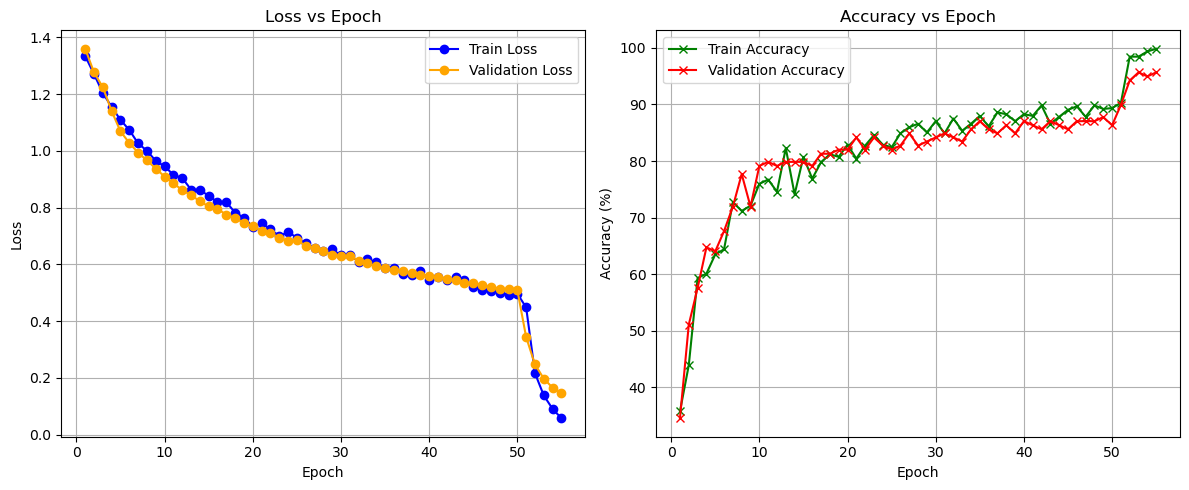

In [21]:
# Plotting
epochs = list(range(1, len(train_losses) + 1))
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', color='blue', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', color='orange', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', color='green', marker='x')
plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='red', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Epoch')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## **Save Model**

In [29]:

torch.save(resnet50.state_dict(), "resnet50_uncropped.pth")
print("Model saved successfully!")

Model saved successfully!


##  **Evaluate on Test Set**


Test Loss: 0.1348
Test Accuracy: 95.71%

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       1.00      0.85      0.92        26
           2       1.00      1.00      1.00        36
           3       0.90      1.00      0.95        43

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



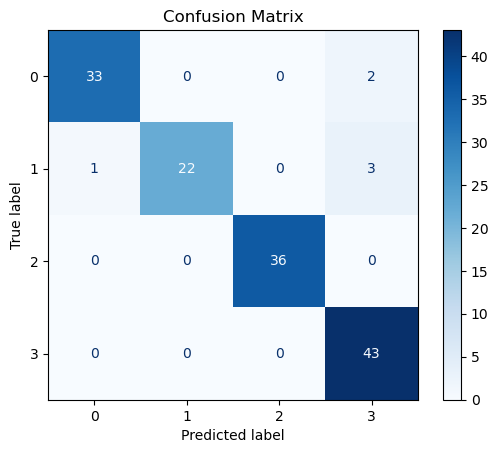

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Set model to evaluation mode
resnet50.eval()
criterion = nn.CrossEntropyLoss()

all_preds = []
all_labels = []
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet50(images)
        
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate average loss and accuracy
test_loss /= len(test_loader)
test_accuracy = 100 * correct / total

# Print results
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


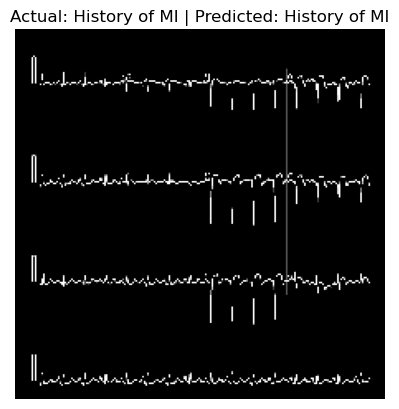

In [42]:
import random
import torch
import matplotlib.pyplot as plt

# Assuming resnet50 is already trained and is on the device (GPU/CPU)

# Define class names corresponding to numeric class labels
class_names = ["Abnormal Heartbeat", "History of MI", "MI", "Normal"] # Replace with your actual class names

# Get a random batch from the test loader
data_iter = iter(test_loader)
images, labels = next(data_iter)

# Choose a random index in the batch
idx = random.randint(0, images.size(0) - 1)
image = images[idx].unsqueeze(0).to(device)
actual_label = labels[idx].item()

# Perform prediction using the trained model
resnet50.eval()  # Set model to evaluation mode
with torch.no_grad():
    output = resnet50(image)
    _, predicted_label = torch.max(output, 1)
    predicted_label = predicted_label.item()

# Convert tensor to numpy image for display
img_to_show = images[idx].permute(1, 2, 0).cpu().numpy()  # Revert back to (H, W, C) format

# Plot the image
plt.imshow(img_to_show)
plt.axis('off')

# Display Actual vs Predicted class names
plt.title(f"Actual: {class_names[actual_label]} | Predicted: {class_names[predicted_label]}")
plt.show()


In [9]:
from io import StringIO
from contextlib import redirect_stdout
import matplotlib.pyplot as plt

In [5]:
import torch
import torchvision.models as models
import torch.nn as nn
from torchsummary import summary

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the architecture
model = models.resnet50(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)

# Load saved weights
model.load_state_dict(torch.load("resnet50_uncropped.pth", map_location=device))

# Move model to device
model = model.to(device)

# Print summary
summary(model, input_size=(3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

C:\Users\sihus\AppData\Local\Temp\ipykernel_32668\3046044854.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


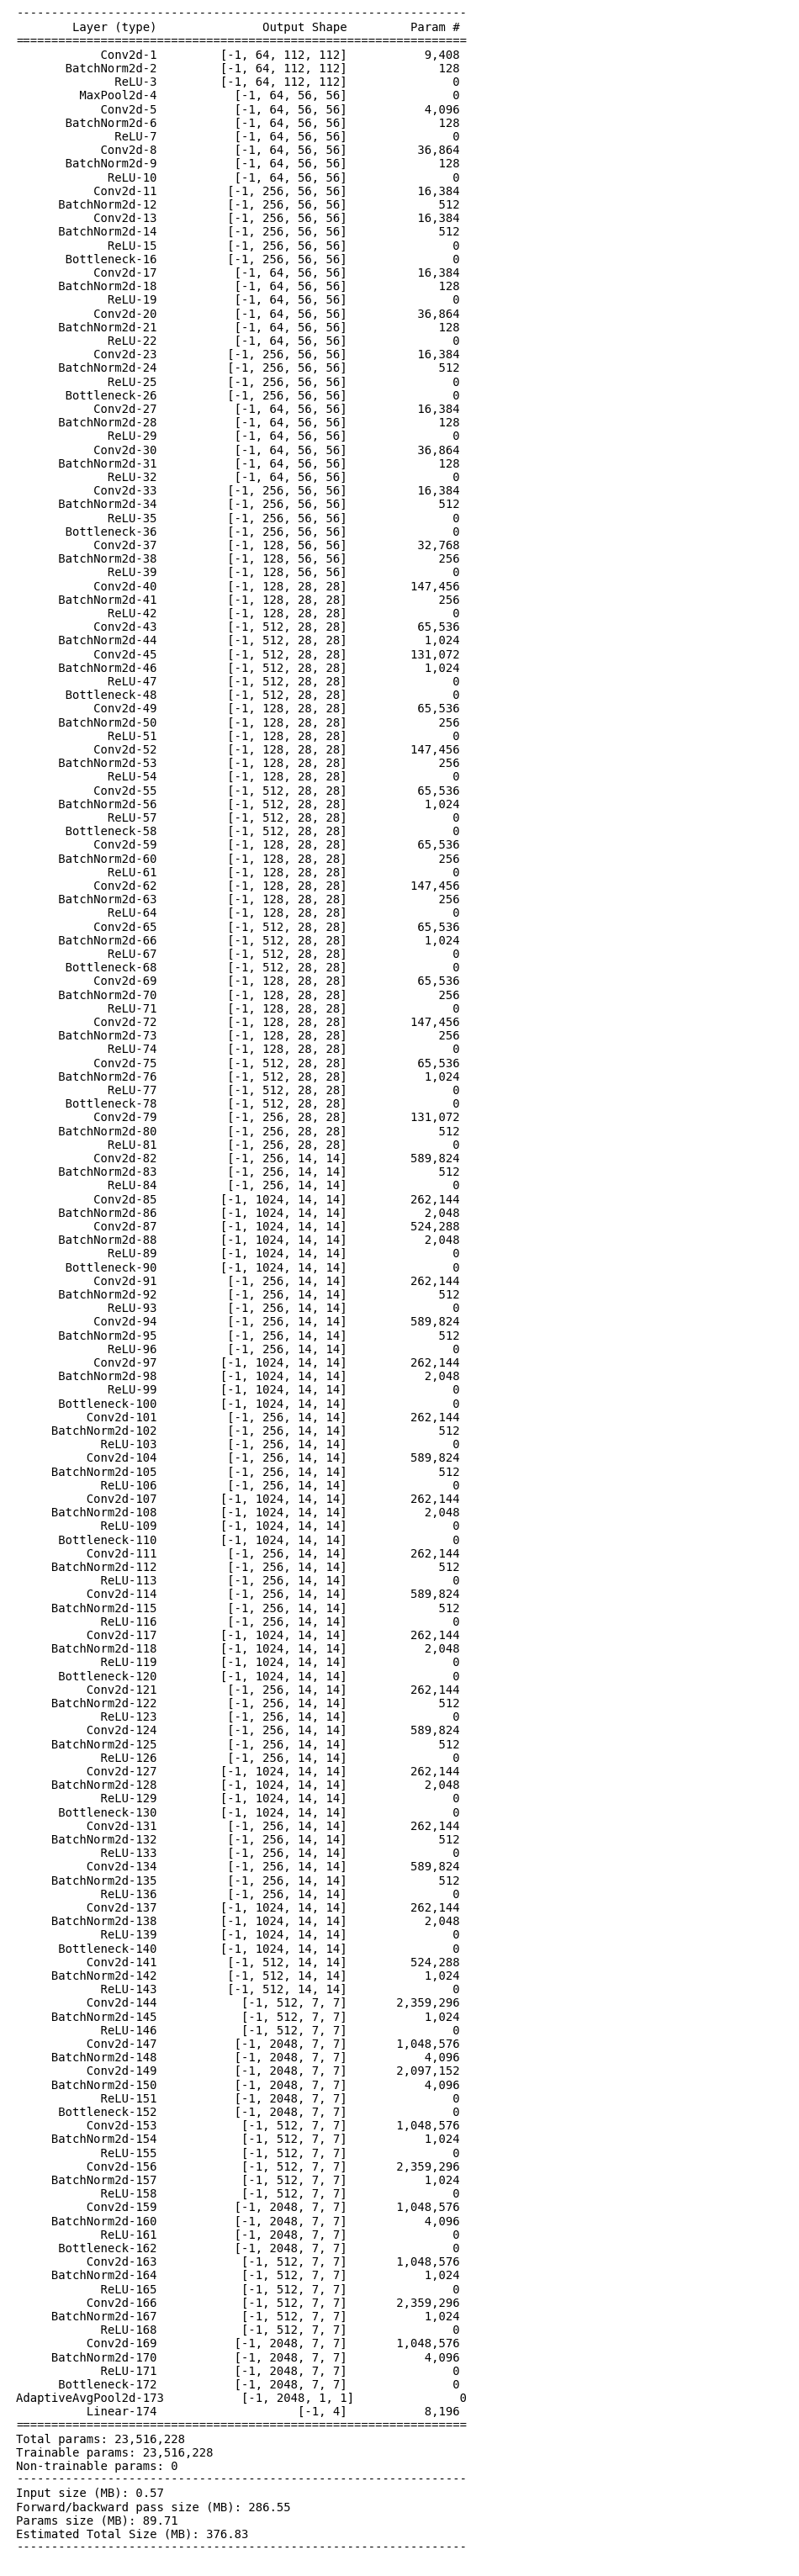

In [11]:
buf = StringIO()
with redirect_stdout(buf):
    summary(model, input_size=(3, 224, 224))
summary_str = buf.getvalue()
buf.close()

# Convert to image using matplotlib
plt.figure(figsize=(12, 8))
plt.text(0.01, 1, summary_str, {'fontsize': 10}, fontfamily='monospace', va='top')
plt.axis('off')
plt.tight_layout()
plt.savefig("model_summary.png", dpi=300)
plt.show()